In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime

In [12]:
df = pd.read_pickle("./data/data_pkls/nasdaq100.pkl")
df.head()

SPLK                                 FTNT                 ... CSGP  \
           Open High Low Close Adj Close Volume Open High Low Close  ...  Low   
Date                                                                 ...        
1962-01-02  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-03  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-04  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-05  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   
1962-01-08  NaN  NaN NaN   NaN       NaN    NaN  NaN  NaN NaN   NaN  ...  NaN   

                                    MU                                  
           Close Adj Close Volume Open High Low Close Adj Close Volume  
Date                                                                    
1962-01-02   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-03   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-04   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-05   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  
1962-01-08   NaN       NaN    NaN  NaN  NaN NaN   NaN       NaN    NaN  

[5 rows x 606 columns]

In [13]:
amd_data = df['AMD']
amd_data.shape

(15618, 6)

In [14]:
amd_data.isnull().sum()

Open         4565
High         4565
Low          4565
Close        4565
Adj Close    4565
Volume       4565
dtype: int64

In [16]:
clean_amd = amd_data.iloc[9000:, :]
clean_amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-09-30,16.21875,16.65625,16.00000,16.28125,16.28125,4521800.0
1997-10-01,14.75000,14.87500,13.37500,13.50000,13.50000,24972400.0
1997-10-02,13.87500,14.50000,13.71875,14.40625,14.40625,10023800.0
1997-10-03,14.50000,15.56250,14.31250,14.90625,14.90625,9889200.0
1997-10-06,15.09375,15.09375,14.03125,14.03125,14.03125,5090800.0


# Ploting AMD stock trends since 1980

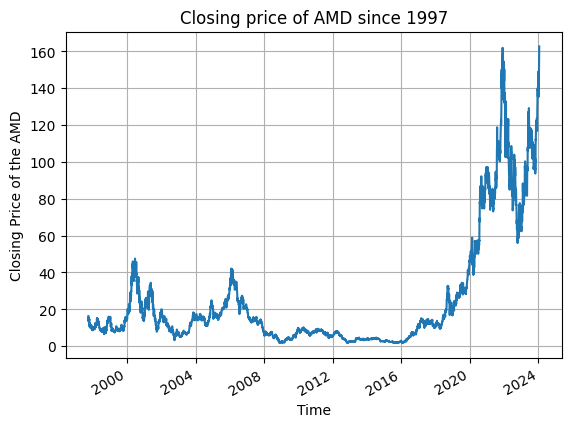

In [18]:
#Plotting the closing price of AMD stock for last one year
clean_amd['Close'].plot()
plt.ylabel('Closing Price of the AMD')
plt.xlabel('Time')
plt.title('Closing price of AMD since 1997')
plt.grid()

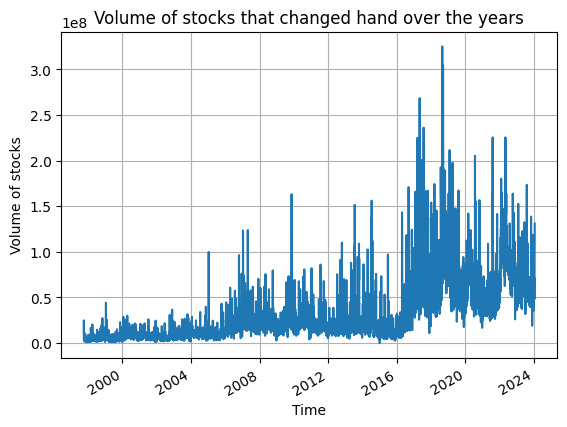

In [19]:
#Plotting the volume of stocks being traded each day for the last year
clean_amd['Volume'].plot()
plt.ylabel('Volume of stocks')
plt.xlabel('Time')
plt.title('Volume of stocks that changed hand over the years')
plt.grid()

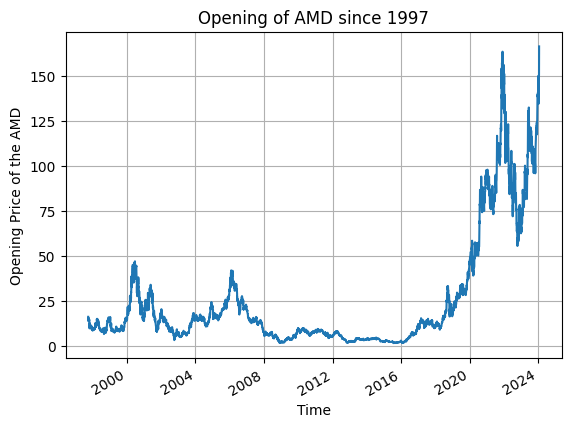

In [20]:
clean_amd['Open'].plot()
plt.ylabel('Opening Price of the AMD')
plt.xlabel('Time')
plt.title('Opening of AMD since 1997')
plt.grid()

In [21]:
clean_amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-09-30,16.21875,16.65625,16.00000,16.28125,16.28125,4521800.0
1997-10-01,14.75000,14.87500,13.37500,13.50000,13.50000,24972400.0
1997-10-02,13.87500,14.50000,13.71875,14.40625,14.40625,10023800.0
1997-10-03,14.50000,15.56250,14.31250,14.90625,14.90625,9889200.0
1997-10-06,15.09375,15.09375,14.03125,14.03125,14.03125,5090800.0


In [23]:
test_split = round(len(clean_amd)*0.20)
data_train = clean_amd[:-test_split]
data_test = clean_amd[-test_split:]
print('Shape of training data: ',data_train.shape)
print('Shape of testing data: ', data_test.shape)

Shape of training data:  (5294, 6)
Shape of testing data:  (1324, 6)


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

data_train_scaled

array([[0.32170009, 0.31972335, 0.32786512, 0.31955645, 0.31955645,
        0.01391073],
       [0.28933451, 0.28167058, 0.2680565 , 0.25893636, 0.25893636,
        0.07682435],
       [0.27005289, 0.27365947, 0.27588858, 0.27868897, 0.27868897,
        0.03083692],
       ...,
       [0.54054649, 0.55586411, 0.55570745, 0.55841325, 0.55841325,
        0.32443955],
       [0.56765093, 0.54924161, 0.53087263, 0.50959024, 0.50959024,
        0.45432728],
       [0.50947553, 0.52360608, 0.52267029, 0.51612902, 0.51612902,
        0.45226888]])

In [27]:
def train_test(dataset, n_backtrack):
    X = []
    y = []

    for i in range(n_backtrack, len(dataset)):
        X.append(dataset[i-n_backtrack:i, 0:dataset.shape[1]])
        y.append(dataset[i, 3])
    
    return np.array(X), np.array(y)

X_train, y_train = train_test(data_train_scaled, 60)
X_test, y_test = train_test(data_test_scaled, 60)

In [28]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_train shape:  (5234, 60, 6)
y_train shape:  (5234,)


In [29]:
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_test shape:  (1264, 60, 6)
y_test shape:  (1264,)


In [68]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60,6)))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss=keras.losses.binary_crossentropy, optimizer= 'Adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=15, batch_size=21)

c:\Users\msi1\Music\AASD4010_project\deep.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step - accuracy: 8.5027e-05 - loss: 0.5468
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 6.5432e-04 - loss: 0.4237
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 7.4477e-05 - loss: 0.4250
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 1.5848e-04 - loss: 0.4250
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 4.0566e-05 - loss: 0.4221
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - accuracy: 7.4377e-04 - loss: 0.4166
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 1.4920e-04 - loss: 0.4166
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 3.6613e-04 - loss: 0.4284
Epoch 9/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 4.7460e-04 - loss: 0.4245
Epoch 10/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 1.3344e-04 - loss: 0.4245
Epoch 11/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 3.7112e-04 -

In [69]:
prediction = model.predict(X_test)
print('Prediction: ', prediction)
print('\nPrediction shape- ', prediction.shape)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step
Prediction:  [[0.41175523]
 [0.41571018]
 [0.4165717 ]
 ...
 [1.6465464 ]
 [1.6592231 ]
 [1.6655415 ]]

Prediction shape-  (1264, 1)


In [72]:
prediciton_copies_array = np.repeat(prediction, 6, axis=-1)

In [73]:
print(prediciton_copies_array)

[[0.41175523 0.41175523 0.41175523 0.41175523 0.41175523 0.41175523]
 [0.41571018 0.41571018 0.41571018 0.41571018 0.41571018 0.41571018]
 [0.4165717  0.4165717  0.4165717  0.4165717  0.4165717  0.4165717 ]
 ...
 [1.6465464  1.6465464  1.6465464  1.6465464  1.6465464  1.6465464 ]
 [1.6592231  1.6592231  1.6592231  1.6592231  1.6592231  1.6592231 ]
 [1.6655415  1.6655415  1.6655415  1.6655415  1.6655415  1.6655415 ]]


In [74]:
prediciton_copies_array.shape

(1264, 6)

In [75]:
pred = scaler.inverse_transform(np.reshape(prediciton_copies_array, (len(prediction), 6)))[:,3]

In [76]:
#Now we need to compare this pred values with testY. But our testY is also scaled. 
#So, let’s use inverse transform with the same above codes.

original_copies_array = np.repeat(y_test, 6, axis=-1)
original= scaler.inverse_transform(np.reshape(original_copies_array, (len(y_test), 6)))[:,3]

In [77]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [20.51133  20.692783 20.73231  ... 77.16355  77.745155 78.03505 ]

Original Values--  [ 19.73999977  20.27000046  20.22999954 ... 158.74000549 160.16999817
 162.66999817]


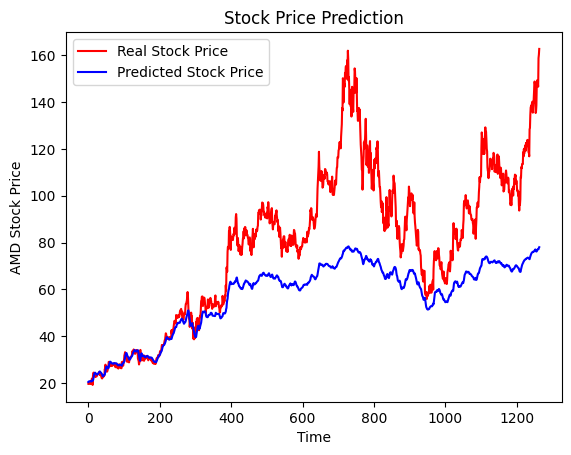

In [80]:
plt.plot(original, color = 'red', label = 'Real Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()

In [83]:
#predicting the latest values
df_30_days_past=clean_amd.iloc[-30:,:]
df_30_days_past.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-11,148.520004,150.380005,143.690002,148.020004,148.020004,62764600.0
2024-01-12,148.039993,148.750000,145.000000,146.559998,146.559998,48250800.0
2024-01-16,150.360001,159.720001,149.979996,158.740005,158.740005,112711400.0
2024-01-17,158.449997,160.639999,154.399994,160.169998,160.169998,104085000.0
2024-01-18,166.199997,168.600006,158.229996,162.669998,162.669998,130921708.0
